In [1]:
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'legend.fontsize':30})
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['axes.grid'] = False
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15
plt.rcParams['xtick.minor.size'] = 7
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams.update({'figure.max_open_warning': 0})

#sys.stdout = open('/home/scratch/SDCunist/DL512/output.txt','w')
print(f'tf.__version__: {tf.__version__}')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

import numpy as np
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D, BatchNormalization, Activation, Dropout,Conv2DTranspose


2024-01-03 15:57:52.640832: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


tf.__version__: 2.4.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')


2024-01-03 15:57:57.220727: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-03 15:57:57.229010: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-01-03 15:57:57.277202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:63:00.0 name: A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-01-03 15:57:57.279050: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:62:00.0 name: A100 80GB PCIe computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.35GiB deviceMemoryBandwidth: 1.76TiB/s
2024-01-03 15:57:57.280238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:61:00.0 name: A100-PCIE-40GB com

In [2]:
x_train=np.load('/home/scratch/SDCunist/DL512/train_x.npy')
y_train=np.load('/home/scratch/SDCunist/DL512/train_y.npy')

In [3]:
input_g = tf.keras.Input(shape=(512,512,1))

conv0 = layers.Conv2D(16, (3,3), activation='relu', padding = 'same')(input_g)
mp0 = layers.MaxPooling2D((2,2))(conv0)

conv1 = layers.Conv2D(32, (3,3), activation='relu', padding = 'same')(mp0)
mp1 = layers.MaxPooling2D((2,2))(conv1)

conv2 = layers.Conv2D(64, (3,3), activation='relu', padding = 'same')(mp1)
mp2 = layers.MaxPooling2D((2,2))(conv2)

conv3 = layers.Conv2D(128, (3,3), activation='relu', padding = 'same')(mp2)
#mp3 = layers.MaxPooling2D((2,2))(conv3)

#output_e = layers.Conv2D(256, (3,3), activation='relu', padding = 'same')(mp3)


#convt1 = layers.Conv2DTranspose(128, (3,3), activation='relu', padding='same')(output_e)
#upsamp1 = layers.UpSampling2D((2,2))(convt1)
#skipcon1 = layers.Concatenate(axis=3)([conv3, upsamp1])
#conv5 = layers.Conv2D(128, (3,3), activation = 'relu', padding='same')(skipcon1)

convt2 = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same')(conv3)
upsamp2 = layers.UpSampling2D((2,2))(convt2)
skipcon2 = layers.Concatenate(axis=3)([conv2, upsamp2])
conv6 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(skipcon2)

convt3 = layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same')(conv6)
upsamp3 = layers.UpSampling2D((2,2))(convt3)
skipcon3 = layers.Concatenate(axis=3)([conv1, upsamp3])
conv7 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(skipcon3)

convt4 = layers.Conv2DTranspose(16, (3,3), activation='relu', padding='same')(conv7)
upsamp4 = layers.UpSampling2D((2,2))(convt4)
skipcon4 = layers.Concatenate(axis=3)([conv0, upsamp4])
conv8 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(skipcon4)

output_p = layers.Conv2DTranspose(1, (3,3), activation='tanh', padding='same')(conv8)

#from keras.callbacks import EarlyStopping

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


2024-01-03 15:58:13.749790: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 15:58:13.756165: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-01-03 15:58:14.353715: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:63:00.0 name: A100-PCIE-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-01-03 15:58:14.355983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:62:00.0 name: A100 80GB PCIe computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.35Gi

In [4]:
y_test=np.load('/home/scratch/SDCunist/DL512/test_y.npy')
x_test=np.load('/home/scratch/SDCunist/DL512/test_x.npy')

In [5]:
model = Model(inputs=input_g, outputs=output_p)
model.compile(optimizer='adam', loss=losses.MeanSquaredError())
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 4640        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [6]:
history = model.fit(x_train, y_train,
                epochs=100,
                batch_size=16,
                validation_data=(x_test,y_test)
                )

model.save("/home/scratch/SDCunist/DL512/DL512.h5")

2024-01-03 15:58:37.025456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-01-03 15:58:37.025959: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/100


2024-01-03 15:58:37.839750: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2024-01-03 16:09:56.034088: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2024-01-03 16:09:56.633604: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


625/625 [==============================] - 742s 98ms/step - loss: 3.9216e-06 - val_loss: 7.3472e-07
Epoch 2/100
625/625 [==============================] - 55s 89ms/step - loss: 6.5684e-07 - val_loss: 1.4864e-07
Epoch 3/100
625/625 [==============================] - 56s 90ms/step - loss: 1.5797e-07 - val_loss: 2.9167e-07
Epoch 4/100
625/625 [==============================] - 57s 91ms/step - loss: 1.4801e-07 - val_loss: 6.0589e-08
Epoch 5/100
625/625 [==============================] - 57s 91ms/step - loss: 4.5151e-07 - val_loss: 4.6655e-07
Epoch 6/100
625/625 [==============================] - 56s 89ms/step - loss: 4.0331e-07 - val_loss: 1.8900e-07
Epoch 7/100
625/625 [==============================] - 56s 89ms/step - loss: 1.7181e-07 - val_loss: 9.3208e-08
Epoch 8/100
625/625 [==============================] - 56s 90ms/step - loss: 1.1379e-07 - val_loss: 7.5383e-08
Epoch 9/100
625/625 [==============================] - 56s 90ms/step - loss: 2.1977e-07 - val_loss: 1.1666e-07
Epoch 10/100

625/625 [==============================] - 55s 88ms/step - loss: 2.8024e-08 - val_loss: 8.8457e-09
Epoch 75/100
625/625 [==============================] - 55s 88ms/step - loss: 1.7505e-08 - val_loss: 4.5594e-08
Epoch 76/100
625/625 [==============================] - 54s 87ms/step - loss: 1.6803e-08 - val_loss: 9.5153e-09
Epoch 77/100
625/625 [==============================] - 55s 88ms/step - loss: 9.5797e-09 - val_loss: 9.5900e-09
Epoch 78/100
625/625 [==============================] - 55s 89ms/step - loss: 1.1356e-08 - val_loss: 1.0068e-08
Epoch 79/100
625/625 [==============================] - 54s 87ms/step - loss: 1.8656e-08 - val_loss: 8.8542e-09
Epoch 80/100
625/625 [==============================] - 54s 87ms/step - loss: 1.6794e-08 - val_loss: 9.1341e-09
Epoch 81/100
625/625 [==============================] - 55s 88ms/step - loss: 1.1485e-08 - val_loss: 1.0902e-08
Epoch 82/100
625/625 [==============================] - 56s 89ms/step - loss: 1.8295e-08 - val_loss: 1.5651e-07
Epoch

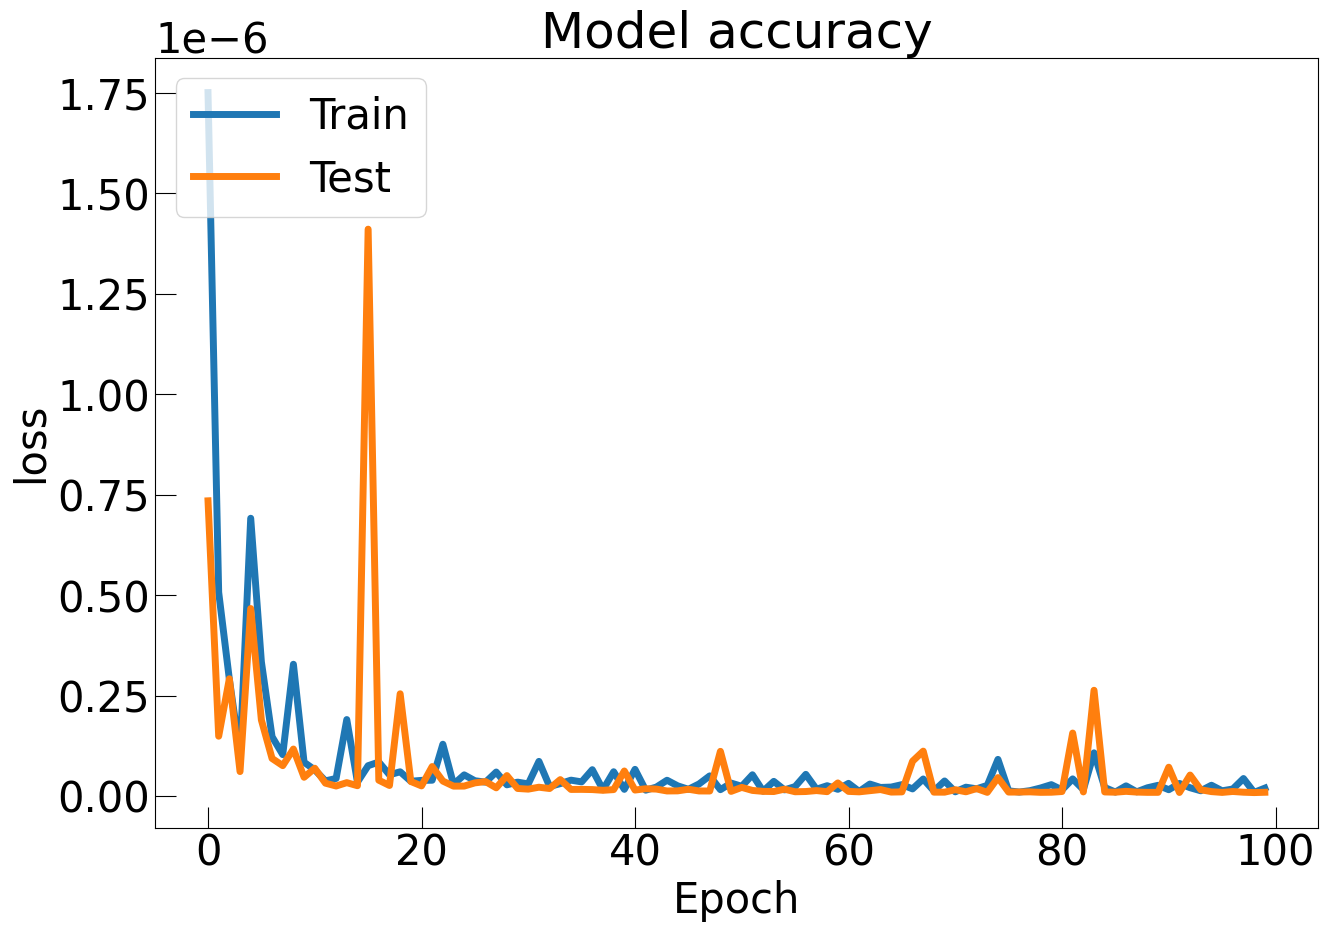

In [7]:
plt.figure(0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("/home/scratch/SDCunist/DL512/loss_function")


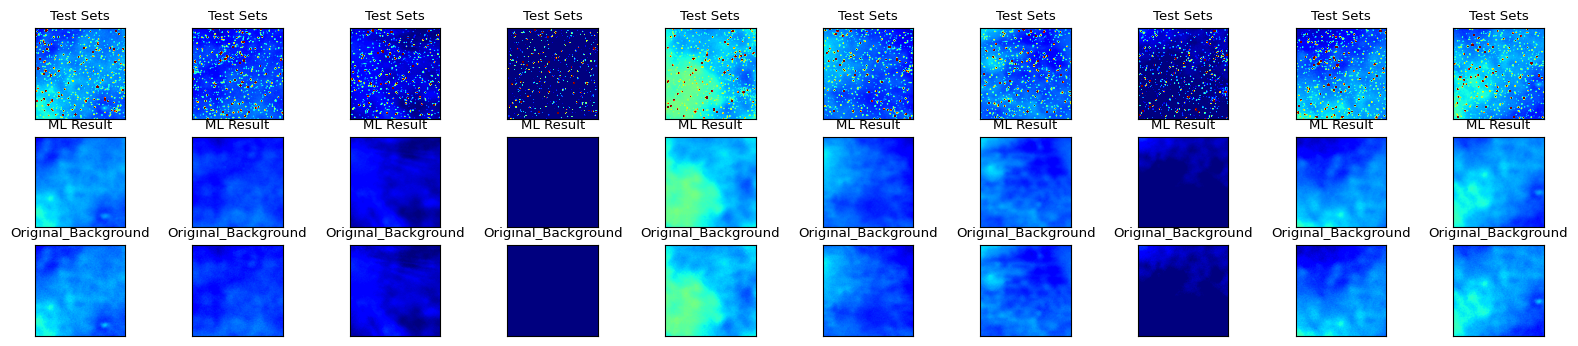

In [8]:
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'legend.fontsize':8})

final_imgs = model(x_test[:200]).numpy()
n = 10
plt.figure(figsize=(20, 4))


for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.title("Test Sets")
    plt.imshow(tf.squeeze(x_test[20*i,:,:]),vmin=-0.01,vmax=0.01)
    plt.jet()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(3, n, i + n + 1)
    plt.title("ML Result")
    plt.imshow(tf.squeeze(final_imgs[20*i,:,:]),vmin=-0.01,vmax=0.01)
    plt.jet()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("Original_Background")
    plt.imshow(tf.squeeze(y_test[20*i,:,:]),vmin=-0.01,vmax=0.01)
    plt.jet()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.savefig("/home/scratch/SDCunist/DL512/test")


In [9]:
data = np.load('/home/scratch/SDCunist/DL512/test_data.npy')
model_path = '/home/scratch/SDCunist/DL512/DL512.h5'
loaded_model = load_model(model_path)

prediction=loaded_model(data[:100]).numpy()

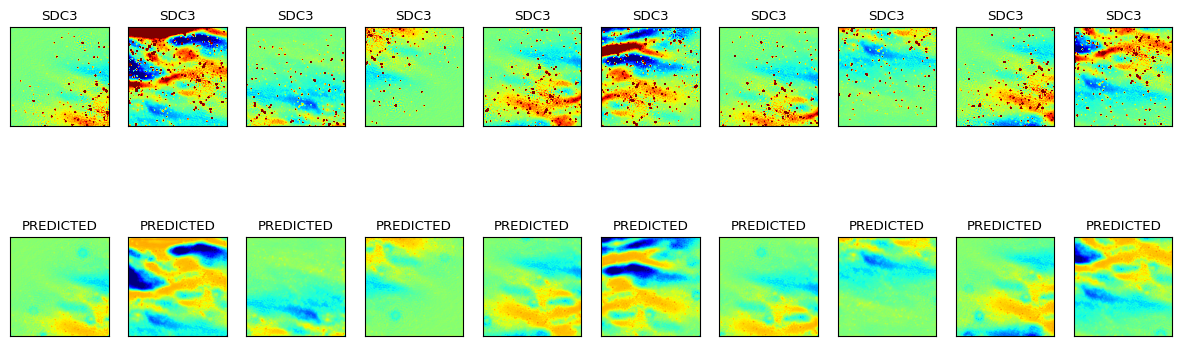

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'legend.fontsize':8})
n=10
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("SDC3")
    plt.imshow(tf.squeeze(data[10*i,:,:]),vmin=-0.003,vmax=0.003)
    plt.jet()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("PREDICTED")
    plt.imshow(tf.squeeze(prediction[10*i,:,:]),vmin=-0.003,vmax=0.003)
    plt.jet()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)


plt.savefig("/home/scratch/SDCunist/DL512/SDC3_test")